<a href="https://colab.research.google.com/github/Teliciada/Teliciada/blob/main/Regression_Wine_Quality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating the dataset

In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
df_red  = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df_white  = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

df_red['red'] = 1
df_red['white'] = 0
df_white['red'] = 0
df_white['white'] = 1
df = df_red.append(df_white)

dep_var = ['quality']


discrete_vars = ['free sulfur dioxide', 'total sulfur dioxide', 'red', 'white']


continuous_vars = list(df)
continuous_vars.remove('quality')
continuous_vars.remove('free sulfur dioxide')
continuous_vars.remove('total sulfur dioxide')
continuous_vars.remove('red')
continuous_vars.remove('white')
continuous_vars

<ipython-input-2-12ea924ac40c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_red.append(df_white)


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [3]:
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression

In [4]:
# Numerical - impute, scale
num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars + continuous_vars)]


In [5]:
ct = ColumnTransformer(transformers=num_transformers)
ct.fit(df[discrete_vars + continuous_vars])
X = ct.transform(df[discrete_vars + continuous_vars])
y = df[dep_var].values

In [6]:
#Pandas DataFrame version just used for testing
y2 = df[dep_var]
X2 = df[discrete_vars + continuous_vars]

In [7]:
num_transformers

[('num',
  Pipeline(steps=[('si', SimpleImputer(strategy='median')),
                  ('scl', MinMaxScaler())]),
  ['free sulfur dioxide',
   'total sulfur dioxide',
   'red',
   'white',
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'density',
   'pH',
   'sulphates',
   'alcohol'])]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10086)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5197, 13) (1300, 13) (5197, 1) (1300, 1)


In [9]:
print(type(X))
print(type(X2))
print(type(y))
print(type(y2))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


#Exploring the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   int64  
 13  white                 6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 761.4 KB


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [12]:
list(df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'red',
 'white']

In [13]:
df[dep_var].value_counts()

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
dtype: int64

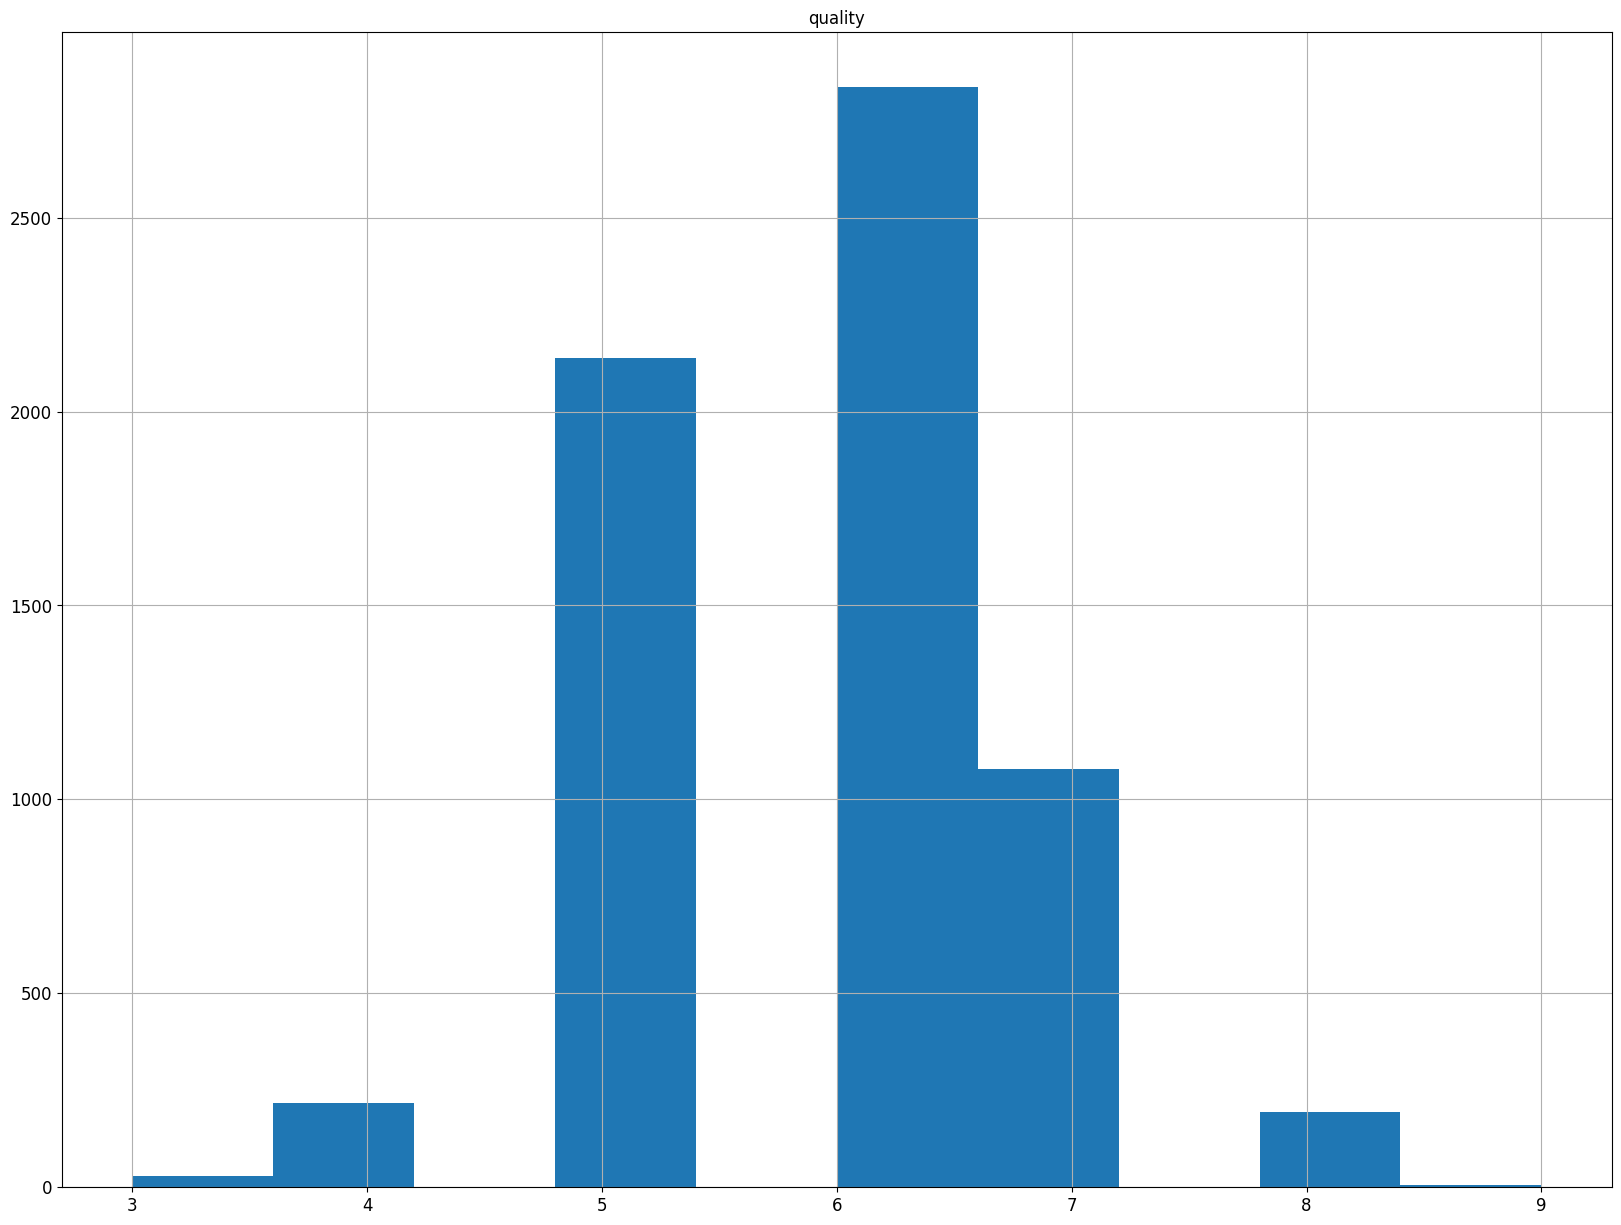

In [14]:
df.loc[:, dep_var].hist(bins=10, figsize=(20,15))
plt.show()

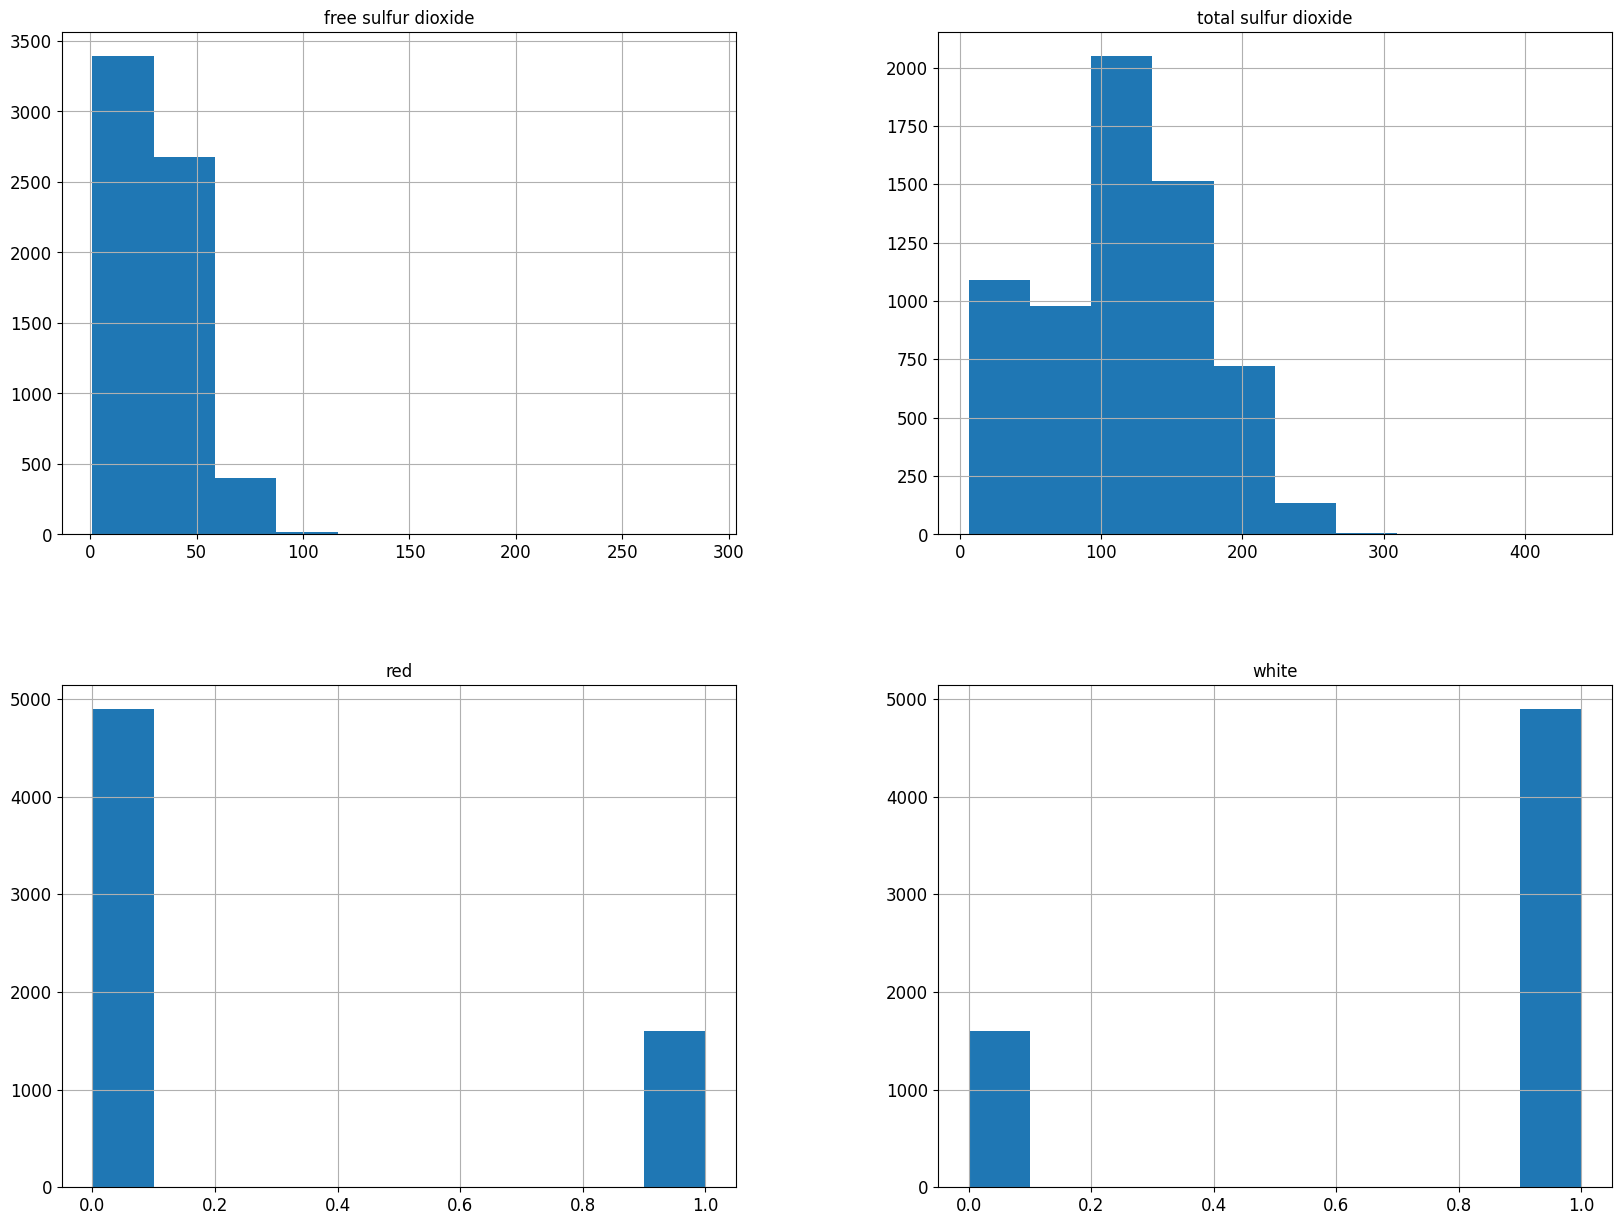

In [15]:
df.loc[:, discrete_vars].hist(bins=10, figsize=(20,15))
plt.show()

In [16]:
# Add your code here
for item in discrete_vars:
  print(df[item].value_counts(bins=5))
  print()

(0.711, 58.6]     6068
(58.6, 116.2]      421
(116.2, 173.8]       7
(231.4, 289.0]       1
(173.8, 231.4]       0
Name: free sulfur dioxide, dtype: int64

(92.8, 179.6]                 3563
(5.5649999999999995, 92.8]    2067
(179.6, 266.4]                 855
(266.4, 353.2]                  10
(353.2, 440.0]                   2
Name: total sulfur dioxide, dtype: int64

(-0.002, 0.2]    4898
(0.8, 1.0]       1599
(0.2, 0.4]          0
(0.4, 0.6]          0
(0.6, 0.8]          0
Name: red, dtype: int64

(0.8, 1.0]       4898
(-0.002, 0.2]    1599
(0.2, 0.4]          0
(0.4, 0.6]          0
(0.6, 0.8]          0
Name: white, dtype: int64



In [17]:
# Add your code here
for item in continuous_vars:
  print(df[item].value_counts(bins=5))
  print()

(6.22, 8.64]      4587
(3.787, 6.22]     1214
(8.64, 11.06]      559
(11.06, 13.48]     123
(13.48, 15.9]       14
Name: fixed acidity, dtype: int64

(0.0775, 0.38]    4680
(0.38, 0.68]      1504
(0.68, 0.98]       284
(0.98, 1.28]        26
(1.28, 1.58]         3
Name: volatile acidity, dtype: int64

(-0.00266, 0.332]    3879
(0.332, 0.664]       2479
(0.664, 0.996]        131
(0.996, 1.328]          7
(1.328, 1.66]           1
Name: citric acid, dtype: int64

(0.534, 13.64]    5947
(13.64, 26.68]     547
(26.68, 39.72]       2
(52.76, 65.8]        1
(39.72, 52.76]       0
Name: residual sugar, dtype: int64

(0.0073999999999999995, 0.129]    6340
(0.129, 0.25]                      126
(0.25, 0.37]                        17
(0.37, 0.491]                       12
(0.491, 0.611]                       2
Name: chlorides, dtype: int64

(0.986, 0.997]    5244
(0.997, 1.008]    1250
(1.008, 1.018]       2
(1.029, 1.039]       1
(1.018, 1.029]       0
Name: density, dtype: int64

(2.978, 3.236

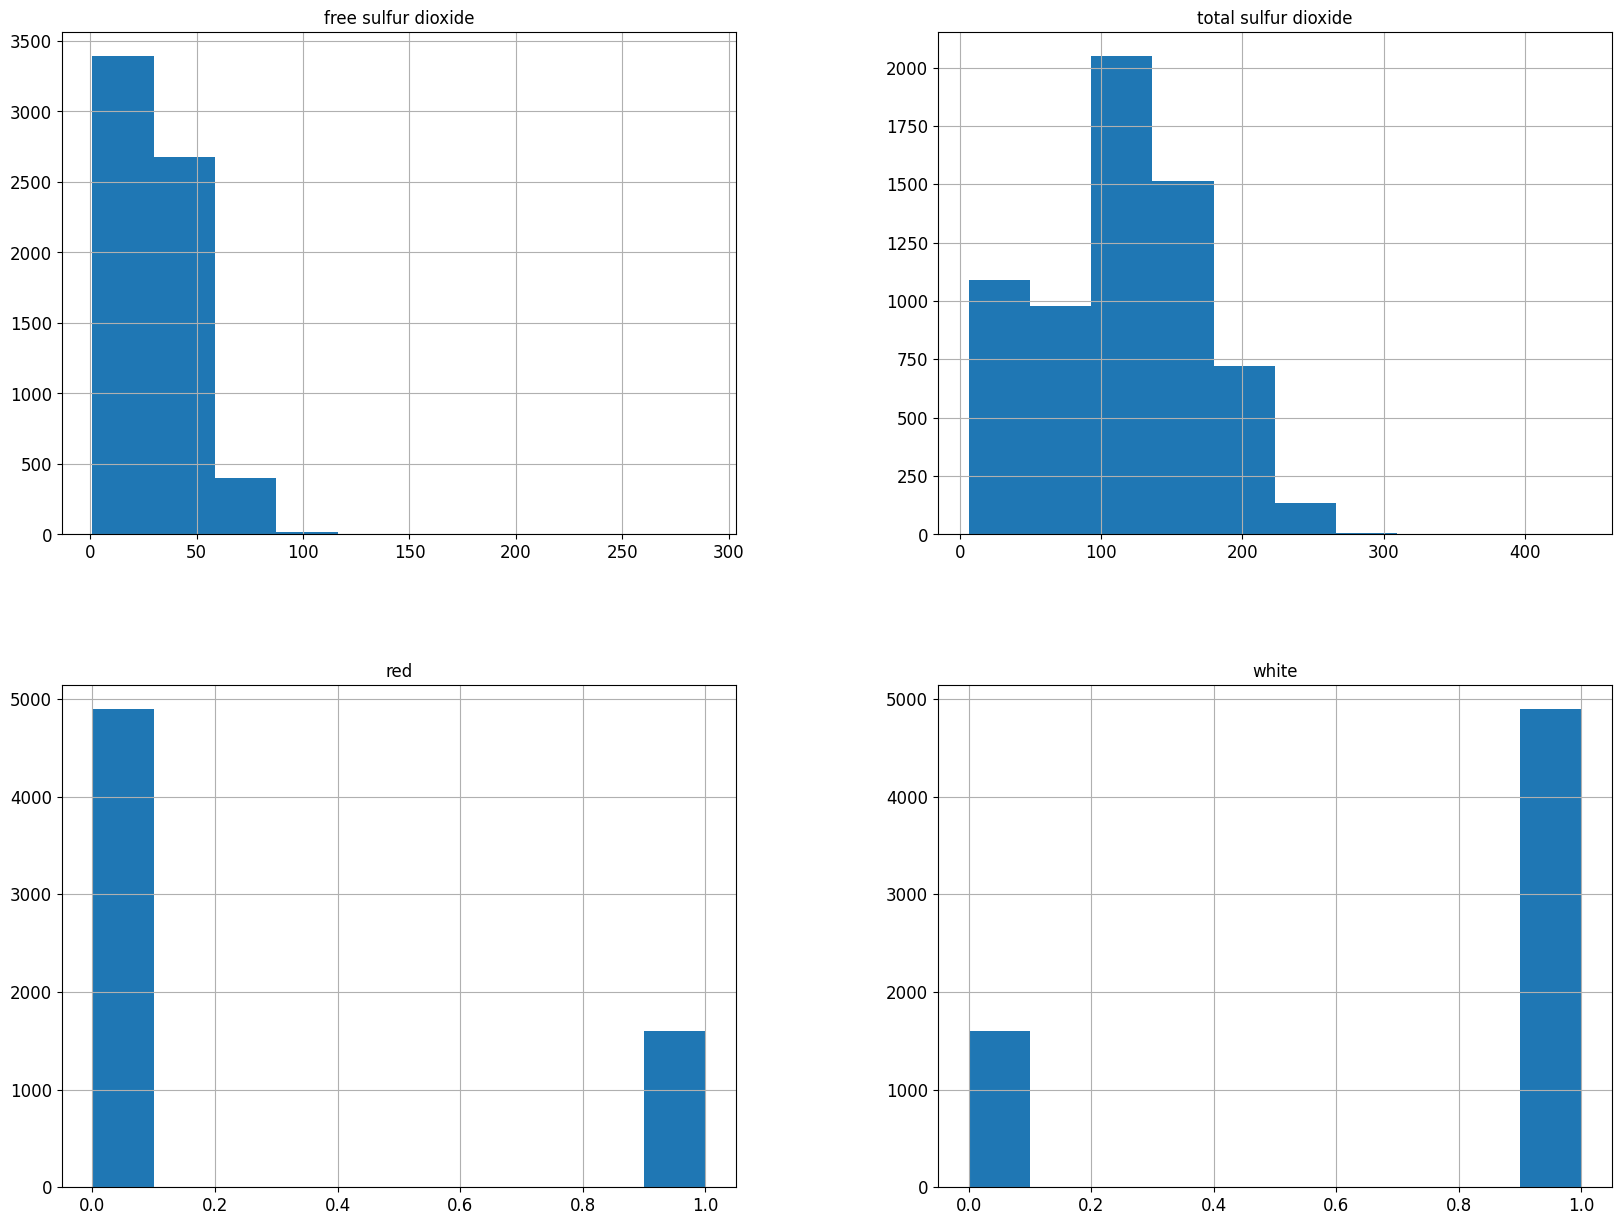

In [18]:
df.loc[:, discrete_vars].hist(bins=10, figsize=(20,15))
plt.show()

#Linear Regression

In [19]:
# Root Mean Squared Error
def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None

In [20]:
def display_results(model, X, y):
    #print(type(model))
    print("RMSE:", rmse(model.predict(X), y))
    print("Predicted 1-5:", model.predict(X_test[0:5]))
    print("Actual 1-5:", y_test[0:5, 0])
    print(type(model))

In [21]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, np.ravel(y_train))
pred_lreg = lreg.predict(X)
display_results(lreg, X, y)

RMSE: 0.9993358109790809
Predicted 1-5: [5.92459687 5.28806662 5.57548258 5.76151772 5.9932289 ]
Actual 1-5: [7 5 5 5 6]
<class 'sklearn.linear_model._base.LinearRegression'>


In [22]:
from sklearn.linear_model import ElasticNet

enr = ElasticNet()
enr.fit(X_train, np.ravel(y_train))
pred_enr = enr.predict(X)
display_results(enr, X, y)

RMSE: 0.873189458526622
Predicted 1-5: [5.81681739 5.81681739 5.81681739 5.81681739 5.81681739]
Actual 1-5: [7 5 5 5 6]
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>


In [23]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(tol=1e-3)
sgd.fit(X_train, np.ravel(y_train))
pred_sgd = sgd.predict(X)
display_results(sgd, X, y)

RMSE: 0.9655818601582251
Predicted 1-5: [5.82982683 5.24246784 5.87377801 5.73632494 5.92742551]
Actual 1-5: [7 5 5 5 6]
<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>


In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, np.ravel(y_train))
pred_dtr = dtr.predict(X)
display_results(dtr, X, y)

RMSE: 1.2393021714824635
Predicted 1-5: [5. 6. 5. 5. 5.]
Actual 1-5: [7 5 5 5 6]
<class 'sklearn.tree._classes.DecisionTreeRegressor'>


<ipython-input-25-55a5cc7977bc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


Text(0.5, 0, 'Relative Importance')

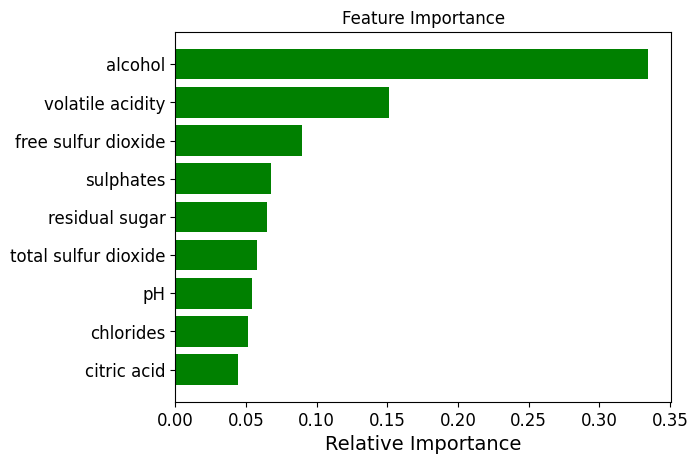

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=1, max_depth=10)

rfr.fit(X_train, y_train)

rfr_fi = rfr.feature_importances_
rfr_ind = np.argsort(rfr_fi)[-9:]

plt.title('Feature Importance')
plt.barh(range(len(rfr_ind)), rfr_fi[rfr_ind], color='g', align='center')
plt.yticks(range(len(rfr_ind)), [list(X2)[i] for i in rfr_ind])
plt.xlabel('Relative Importance')

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
def display_scores(model, X, X_train, X_test, y, y_train, y_test):
    print("RMSE Train:", mean_squared_error(y_train, model.predict(X_train)))
    print("RMSE Test:", mean_squared_error(y_test, model.predict(X_test)))
    print("RMSE X:", mean_squared_error(y, model.predict(X)))
    print("R2 Train:", r2_score(y_train, model.predict(X_train)))
    print("R2 Test:", r2_score(y_test, model.predict(X_test)))
    print("R2 X:", r2_score(y, model.predict(X)))
    print(type(model))

In [28]:
# Below is a better list of all the RMSE scores (including Voting Regression)
display_scores(lreg, X, X_train, X_test, y, y_train, y_test)
display_scores(enr, X, X_train, X_test, y, y_train, y_test)
display_scores(sgd, X, X_train, X_test, y, y_train, y_test)
display_scores(dtr, X, X_train, X_test, y, y_train, y_test)
display_scores(rfr, X, X_train, X_test, y, y_train, y_test)

RMSE Train: 0.5392141728820197
RMSE Test: 0.5282813337318182
RMSE X: 0.5370265954008342
R2 Train: 0.30422857591774655
R2 Test: 0.25836219654268355
R2 X: 0.29566347143309635
<class 'sklearn.linear_model._base.LinearRegression'>
RMSE Train: 0.7749875235150132
RMSE Test: 0.712377968410802
RMSE X: 0.7624598304820019
R2 Train: 0.0
R2 Test: -8.536737695430396e-05
R2 X: -3.1930868666929513e-06
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
RMSE Train: 0.5849817543108935
RMSE Test: 0.5511833467339659
RMSE X: 0.5782189515019037
R2 Train: 0.24517268141599824
R2 Test: 0.22621076976846766
R2 X: 0.24163769068370222
<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>
RMSE Train: 0.0
RMSE Test: 0.71
RMSE X: 0.14206556872402648
R2 Train: 1.0
R2 Test: 0.003252988828857384
R2 X: 0.8136740892147476
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
RMSE Train: 0.22223651892294383
RMSE Test: 0.4047853945637789
RMSE X: 0.25876315249737597
R2 Train: 0.7132385849065368
R2 Test:

In [29]:
from sklearn.ensemble import VotingRegressor

In [30]:
vreg = VotingRegressor([("lreg", lreg), ("enr", enr), ("sgd", sgd), ("dtr", dtr), ("rfr", rfr)])
vreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('lreg', LinearRegression()), ('enr', ElasticNet()),
                            ('sgd', SGDRegressor()),
                            ('dtr', DecisionTreeRegressor()),
                            ('rfr',
                             RandomForestRegressor(max_depth=10,
                                                   random_state=1))])

In [31]:
display_scores(vreg, X, X_train, X_test, y, y_train, y_test)

RMSE Train: 0.29473241192898625
RMSE Test: 0.442913197260528
RMSE X: 0.32438225353757555
R2 Train: 0.6196939912113609
R2 Test: 0.3782078794680479
R2 X: 0.5745568797857525
<class 'sklearn.ensemble._voting.VotingRegressor'>


In [32]:
class Format:
    end = '\033[0m'
    underline = '\033[4m'

print(Format.underline + 'RMSE Values by Model' + Format.end)

RMSE Values by Model


In [33]:
print('\033[4m' + 'RMSE Values by Model' + '\033[0m')
print("Linear Regression:", round(mean_squared_error(y, lreg.predict(X)),3))
print("Elastic Net:", round(mean_squared_error(y, enr.predict(X)),3))
print("SGD Regressor:", round(mean_squared_error(y, sgd.predict(X)),3))
print("Decision Tree Regression:", round(mean_squared_error(y, dtr.predict(X)),3))
print("Random Forest Regression:", round(mean_squared_error(y, rfr.predict(X)),3))
print("Voting Regression:", round(mean_squared_error(y, vreg.predict(X)),3))


RMSE Values by Model
Linear Regression: 0.537
Elastic Net: 0.762
SGD Regressor: 0.578
Decision Tree Regression: 0.142
Random Forest Regression: 0.259
Voting Regression: 0.324


In [34]:
print('\033[4m' + 'RMSE Values by Model using the Training Dataset' + '\033[0m')
print("Linear Regression:", round(mean_squared_error(y_train, lreg.predict(X_train)),3))
print("Elastic Net:", round(mean_squared_error(y_train, enr.predict(X_train)),3))
print("SGD Regressor:", round(mean_squared_error(y_train, sgd.predict(X_train)),3))
print("Decision Tree Regression:", round(mean_squared_error(y_train, dtr.predict(X_train)),3))
print("Random Forest Regression:", round(mean_squared_error(y_train, rfr.predict(X_train)),3))
print("Voting Regression:", round(mean_squared_error(y_train, vreg.predict(X_train)),3))

RMSE Values by Model using the Training Dataset
Linear Regression: 0.539
Elastic Net: 0.775
SGD Regressor: 0.585
Decision Tree Regression: 0.0
Random Forest Regression: 0.222
Voting Regression: 0.295


In [35]:
print('\033[4m' + 'RMSE Values by Model using the Test Dataset' + '\033[0m')
print("Linear Regression:", round(mean_squared_error(y_test, lreg.predict(X_test)),3))
print("Elastic Net:", round(mean_squared_error(y_test, enr.predict(X_test)),3))
print("SGD Regressor:", round(mean_squared_error(y_test, sgd.predict(X_test)),3))
print("Decision Tree Regression:", round(mean_squared_error(y_test, dtr.predict(X_test)),3))
print("Random Forest Regression:", round(mean_squared_error(y_test, rfr.predict(X_test)),3))
print("Voting Regression:", round(mean_squared_error(y_test, vreg.predict(X_test)),3))

RMSE Values by Model using the Test Dataset
Linear Regression: 0.528
Elastic Net: 0.712
SGD Regressor: 0.551
Decision Tree Regression: 0.71
Random Forest Regression: 0.405
Voting Regression: 0.443


In [36]:
xs = X[:20]
ys = y[:20]

pred1 = lreg.predict(xs)
pred2 = enr.predict(xs)
pred3 = sgd.predict(xs)
pred4 = dtr.predict(xs)
pred5 = rfr.predict(xs)
pred6 = vreg.predict(xs)

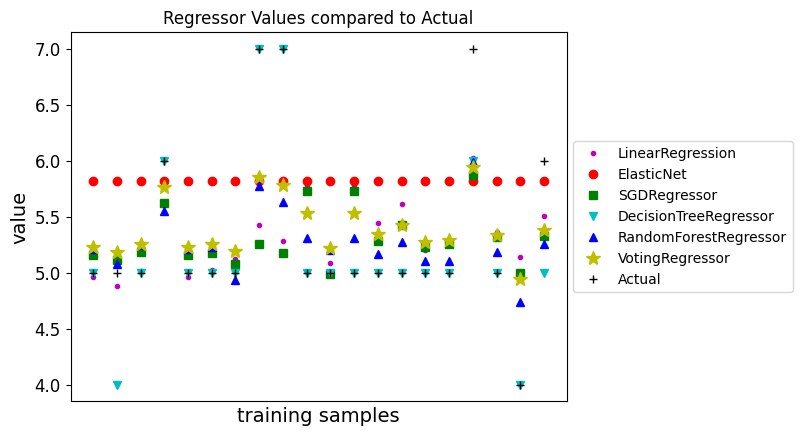

In [37]:
# A visualization of how the models of performing compared to the first 20 rows of data
plt.figure()
plt.plot(pred1, "m.", label="LinearRegression")
plt.plot(pred2, "ro", label="ElasticNet")
plt.plot(pred3, "gs", label="SGDRegressor")
plt.plot(pred4, "cv", label="DecisionTreeRegressor")
plt.plot(pred5, "b^", label="RandomForestRegressor")
plt.plot(pred6, "y*", ms=10, label="VotingRegressor")
plt.plot(ys, "k+", label="Actual")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("value")
plt.xlabel("training samples")
#plt.legend(loc="best")
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Regressor Values compared to Actual")

plt.show()

In [38]:
vreg2 = VotingRegressor([("lreg", lreg), ("sgd", sgd)])
vreg2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('lreg', LinearRegression()),
                            ('sgd', SGDRegressor())])

In [39]:
print('\033[4m' + 'RMSE Values for Voting Regression (Linear, SGD) by Dataset' + '\033[0m')
print("Whole Dataset:", round(mean_squared_error(y, vreg2.predict(X)),3))
print("Training Dataset:", round(mean_squared_error(y_train, vreg2.predict(X_train)),3))
print("Test Dataset:", round(mean_squared_error(y_test, vreg2.predict(X_test)),3))

RMSE Values for Voting Regression (Linear, SGD) by Dataset
Whole Dataset: 0.546
Training Dataset: 0.551
Test Dataset: 0.527


In [40]:
pred7 = vreg2.predict(xs)

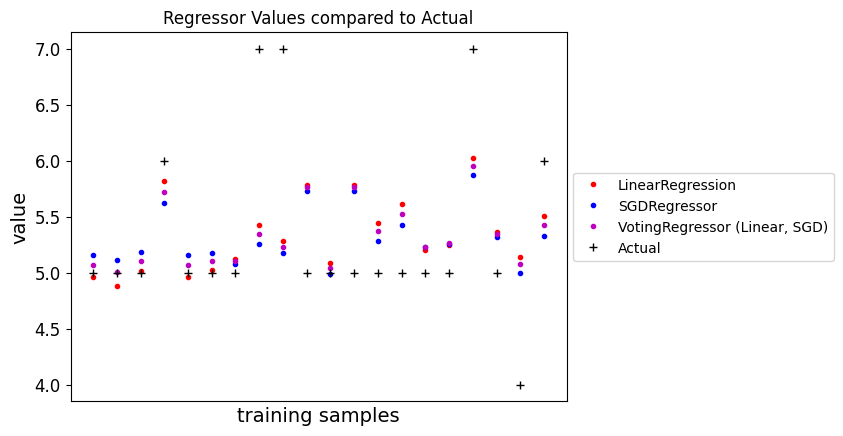

In [41]:
#Including the Voting Regressor that only includes Linear Regression and SGDRegressor
plt.figure()
plt.plot(pred1, "r.", label="LinearRegression")
plt.plot(pred3, "b.", label="SGDRegressor")
plt.plot(pred7, "m.", label="VotingRegressor (Linear, SGD)")
plt.plot(ys, "k+", label="Actual")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("value")
plt.xlabel("training samples")
#plt.legend(loc="best")
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Regressor Values compared to Actual")

plt.show()